In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import dateutil as du

In [2]:
# Set different marker styles for each application
marker_styles = ["o-", "s-", "D-", "*-", "x-", "^-", "v-"]

# Set different colors for each application
colors = {
    "parsec-blackscholes": "#CCA000",
    "parsec-canneal": "#CCCCAA",
    "parsec-dedup": "#CCACCA",
    "parsec-ferret": "#AACCCA",
    "parsec-freqmine": "#0CCA00",
    "parsec-radix": "#00CCA0",
    "parsec-vips": "#CC0A00",
}

policy = {
    "parsec-blackscholes": "[VM1; Core 0]",
    "parsec-canneal": "[VM3; Core 4-7]",
    "parsec-dedup": "[VM1; Core 0]",
    "parsec-ferret": "[VM3; Core 0-3]",
    "parsec-freqmine": "[VM2; Core 0-3]",
    "parsec-radix": "[VM1; Core 0]",
    "parsec-vips": "[VM3; Core 4-7]"
}

In [4]:
table_one = pd.read_csv("./experiments/final_policy/part_3_result_group_054/mcperf_1.txt", delim_whitespace=True)
table_two = pd.read_csv("./experiments/final_policy/part_3_result_group_054/mcperf_2.txt", delim_whitespace=True)
table_three = pd.read_csv("./experiments/final_policy/part_3_result_group_054/mcperf_3.txt", delim_whitespace=True)

table_three

,#type,avg,std,min,p5,p10,p50,p67,p75,p80,p85,p90,p95,p99,p999,p9999,QPS,target,ts_start,ts_end
0,read,189.7,150.8,68.9,108.4,117.5,170.7,199.5,218.4,233.1,251.9,276.2,311.2,385.9,1603.4,7332.5,29919.4,30000,1684766917134,1684766927263
1,read,192.4,190.4,74.4,110.5,119.6,172.4,201.3,220.5,235.1,254.5,279.7,314.2,388.1,1564.3,8648.1,30021.6,30005,1684766928769,1684766938886
2,read,204.7,254.1,74.4,111.5,120.9,175.7,206.6,226.9,243.3,265.2,292.7,329.5,472.7,3671.8,9299.2,29934.7,30010,1684766940394,1684766950500
3,read,200.6,236.2,74.4,113.6,123.0,176.7,206.6,225.6,240.5,260.7,286.8,319.4,420.8,2339.8,8898.8,29994.2,30015,1684766952008,1684766962114
4,read,218.6,363.9,74.4,114.4,124.5,178.7,209.8,230.0,246.7,267.8,294.1,335.5,736.0,5674.7,15272.3,30076.0,30020,1684766963623,1684766973730
5,read,208.7,350.4,74.4,110.0,118.1,167.7,196.5,216.0,232.0,253.4,281.5,318.7,687.7,5749.7,10815.7,29966.0,30025,1684766975236,1684766985342
6,read,218.4,370.0,74.4,112.0,121.5,175.3,204.9,224.6,240.8,263.4,292.0,331.5,852.4,5944.0,11879.5,30155.6,30030,1684766986852,1684766996955
7,read,221.4,409.2,74.4,111.6,121.8,177.8,208.3,228.6,245.6,268.7,297.8,338.8,688.1,5900.2,15060.0,30013.6,30035,1684766998464,1684767008568
8,read,207.5,303.2,74.4,110.8,120.7,177.7,207.8,226.8,242.1,263.4,291.2,325.8,429.5,4856.9,11481.2,29855.4,30040,1684767010077,1684767020182
9,read,208.0,351.9,74.4,110.3,119.5,172.1,201.0,220.1,235.7,258.6,287.4,323.1,484.6,4917.2,15939.4,29921.4,30045,1684767021689,1684767031802


In [5]:


def to_seconds(start_and_finish_times):
    for k, v in start_and_finish_times.items():
        start_and_finish_times[k] = (du.parser.isoparse(v[0]).timestamp(), du.parser.isoparse(v[1]).timestamp())

    return start_and_finish_times


run_1_start_finish_times = {'parsec-blackscholes': ('2023-05-19T13:01:41Z', '2023-05-19T13:03:48Z'), 'parsec-canneal': ('2023-05-19T13:01:33Z', '2023-05-19T13:03:41Z'), 'parsec-dedup': ('2023-05-19T13:01:34Z', '2023-05-19T13:02:42Z'), 'parsec-ferret': ('2023-05-19T13:01:34Z', '2023-05-19T13:04:01Z'), 'parsec-freqmine': ('2023-05-19T13:01:33Z', '2023-05-19T13:03:58Z'), 'parsec-radix': ('2023-05-19T13:01:34Z', '2023-05-19T13:03:08Z'), 'parsec-vips': ('2023-05-19T13:01:34Z', '2023-05-19T13:02:40Z')}


run_2_start_finish_times = {'parsec-blackscholes': ('2023-05-19T13:23:08Z', '2023-05-19T13:25:21Z'), 'parsec-canneal': ('2023-05-19T13:23:05Z', '2023-05-19T13:25:13Z'), 'parsec-dedup': ('2023-05-19T13:23:07Z', '2023-05-19T13:24:22Z'), 'parsec-ferret': ('2023-05-19T13:23:07Z', '2023-05-19T13:25:34Z'), 'parsec-freqmine': ('2023-05-19T13:23:06Z', '2023-05-19T13:25:31Z'), 'parsec-radix': ('2023-05-19T13:23:06Z', '2023-05-19T13:24:45Z'), 'parsec-vips': ('2023-05-19T13:23:08Z', '2023-05-19T13:24:13Z')}


run_3_start_finish_times = {'parsec-blackscholes': ('2023-05-22T14:49:45Z', '2023-05-22T14:51:20Z'), 'parsec-canneal': ('2023-05-22T14:49:07Z', '2023-05-22T14:51:45Z'), 'parsec-dedup': ('2023-05-22T14:49:31Z', '2023-05-22T14:50:20Z'), 'parsec-ferret': ('2023-05-22T14:49:14Z', '2023-05-22T14:51:47Z'), 'parsec-freqmine': ('2023-05-22T14:49:09Z', '2023-05-22T14:51:34Z'), 'parsec-radix': ('2023-05-22T14:49:06Z', '2023-05-22T14:49:58Z'), 'parsec-vips': ('2023-05-22T14:50:16Z', '2023-05-22T14:51:37Z')}



run_1_start_finish_times = to_seconds(run_1_start_finish_times)
run_2_start_finish_times = to_seconds(run_2_start_finish_times)
run_3_start_finish_times = to_seconds(run_3_start_finish_times)


run_3_start_finish_times


{'parsec-blackscholes': (1684766985.0, 1684767080.0),
 'parsec-canneal': (1684766947.0, 1684767105.0),
 'parsec-dedup': (1684766971.0, 1684767020.0),
 'parsec-ferret': (1684766954.0, 1684767107.0),
 'parsec-freqmine': (1684766949.0, 1684767094.0),
 'parsec-radix': (1684766946.0, 1684766998.0),
 'parsec-vips': (1684767016.0, 1684767097.0)}

In [10]:
import matplotlib.pyplot as plt

def create_plot(data, start_finish, run):

    start_and_finish_times = start_finish
    first_container_start = np.min([x[0] for x in start_and_finish_times.values()])




    data_table = data
    data_table = data_table[data_table['ts_start'] > first_container_start * 1000]

    # Increase the figure size
    fig, axs = plt.subplots(2, figsize=(16, 12))

    # Set the overall title for the figure
    fig.suptitle(f'Memcached p95 Latency with job start and finish times - Run {run}', fontsize=16)

    fig.set_facecolor('white')


    widths = (data_table['ts_end'] - data_table['ts_start'])/1000
    latencies =  data_table['p95']
    x = (data_table['ts_start'] - first_container_start*1000)/1000


    axs[0].grid(True)
    # Define the limits for both subplots
    axs[0].set_xlim([0, 170])
    axs[1].set_xlim([0, 170])

    # Create the bar chart on the first subplot
    axs[0].bar(x, latencies, width=widths, color='blue', alpha=0.7)
    # Add a title and labels to the first subplot
    axs[0].set_xlabel('Time [s]', fontsize=12)
    axs[0].set_ylabel('P95 Latency [ms]', fontsize=12)

    # List of unique y values
    y_values = list(set(k[7:] for k in start_and_finish_times.keys()))

    for k, v in start_and_finish_times.items():
        
        xmin = float(v[0] - first_container_start)
        xmax = float(v[1] - first_container_start)

        y = y_values.index(k[7:])

        # Add a point at the start of the line
        axs[1].plot(xmin, y, marker='o', markersize=5, color=colors[k], label=policy[k])

        # Draw an arrow line
        print(k[7:])
        axs[1].annotate('', xy=(xmax, y), xytext=(xmin, y), arrowprops=dict(arrowstyle='->', lw=1.5, color=colors[k]), label=f"{k[7:]}-{policy[k]}")

    # After the loop, you can set the y ticks and labels to correspond to the actual 'job' names
    axs[1].set_yticks(range(len(y_values)))
    axs[1].set_yticklabels(y_values)




    # Add a title and labels to the second subplot
    axs[1].set_title('Job execution start and finish time', fontsize=14)
    axs[1].set_xlabel('Time [s]', fontsize=12)
    axs[1].set_ylabel('Job Name', fontsize=12)  # Replace 'Job ID' with appropriate label

    # Add a grid to both subplots
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[1].grid(True, linestyle='--', alpha=0.6)

    axs[1].legend(loc='best')
    # Frame both plots
    for ax in axs:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1)

    plt.tight_layout()
    plt.savefig(f'part_3_figure_{run}.png', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


blackscholes
canneal
dedup
ferret
freqmine
radix
vips
blackscholes
canneal
dedup
ferret
freqmine
radix
vips
blackscholes
canneal
dedup
ferret
freqmine
radix
vips


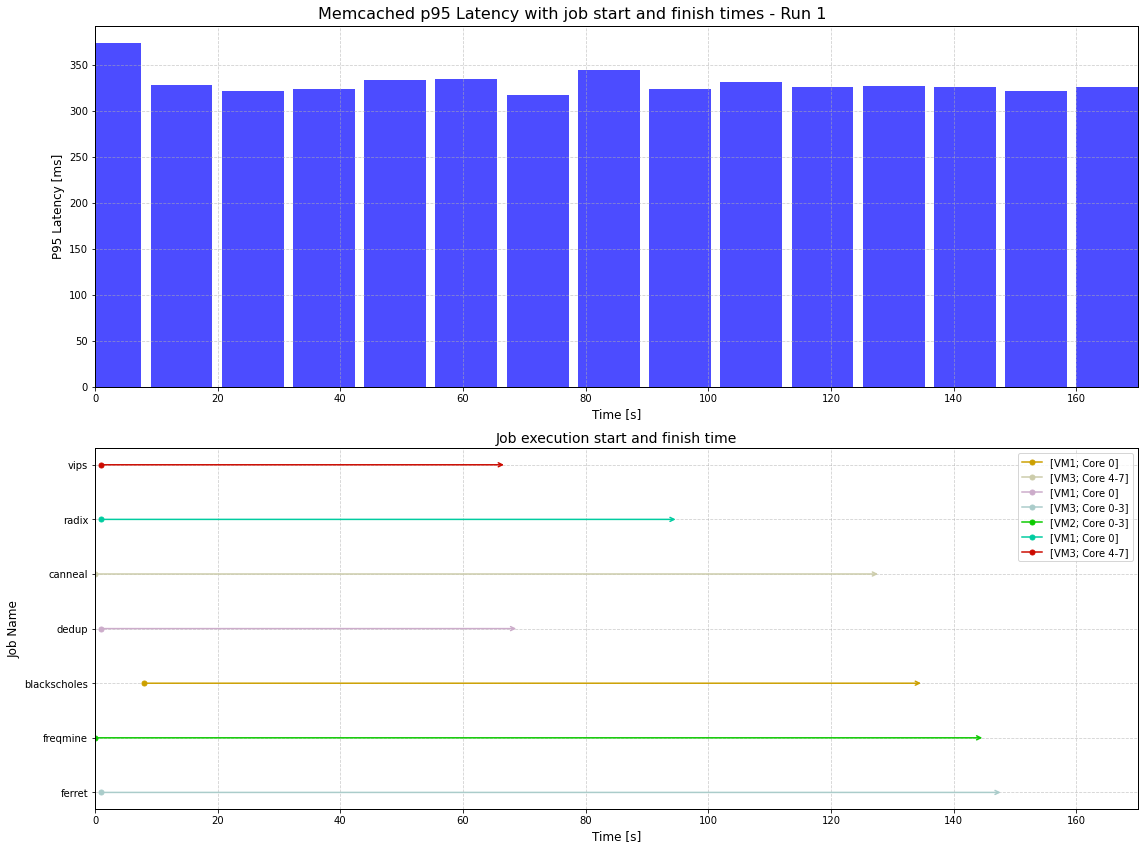

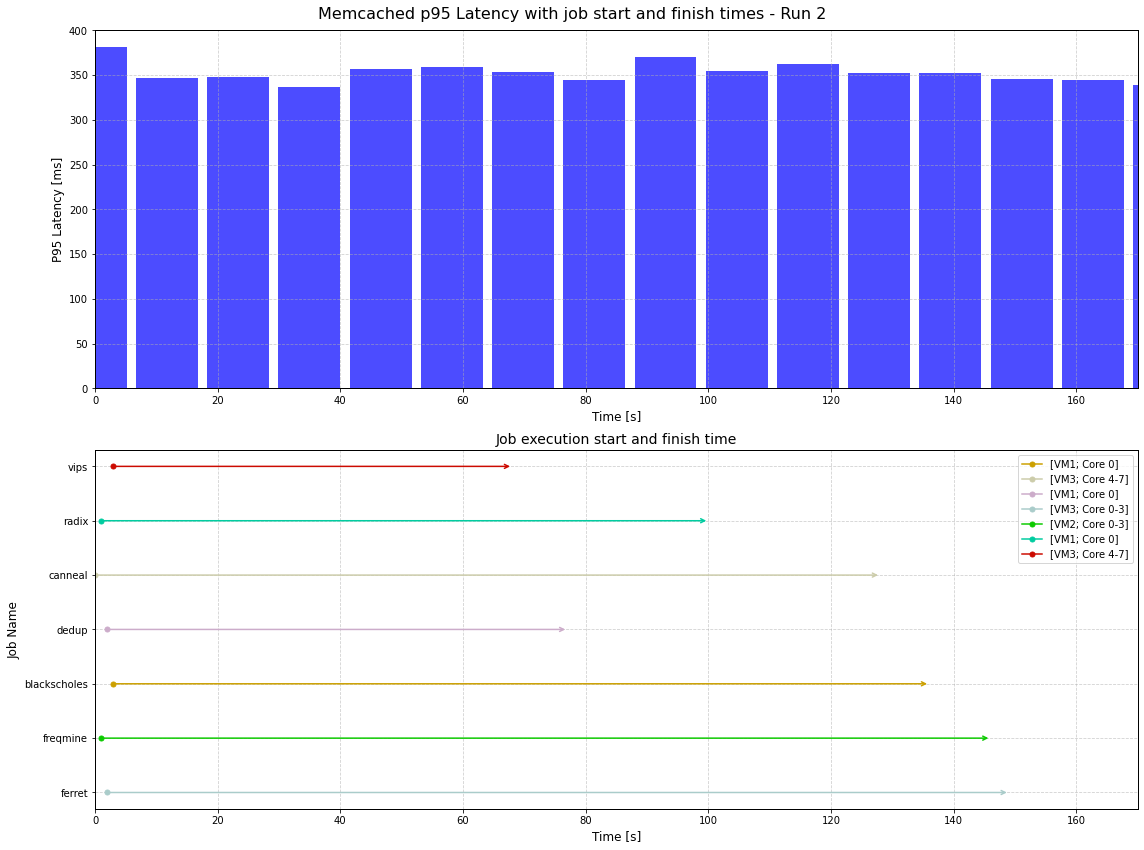

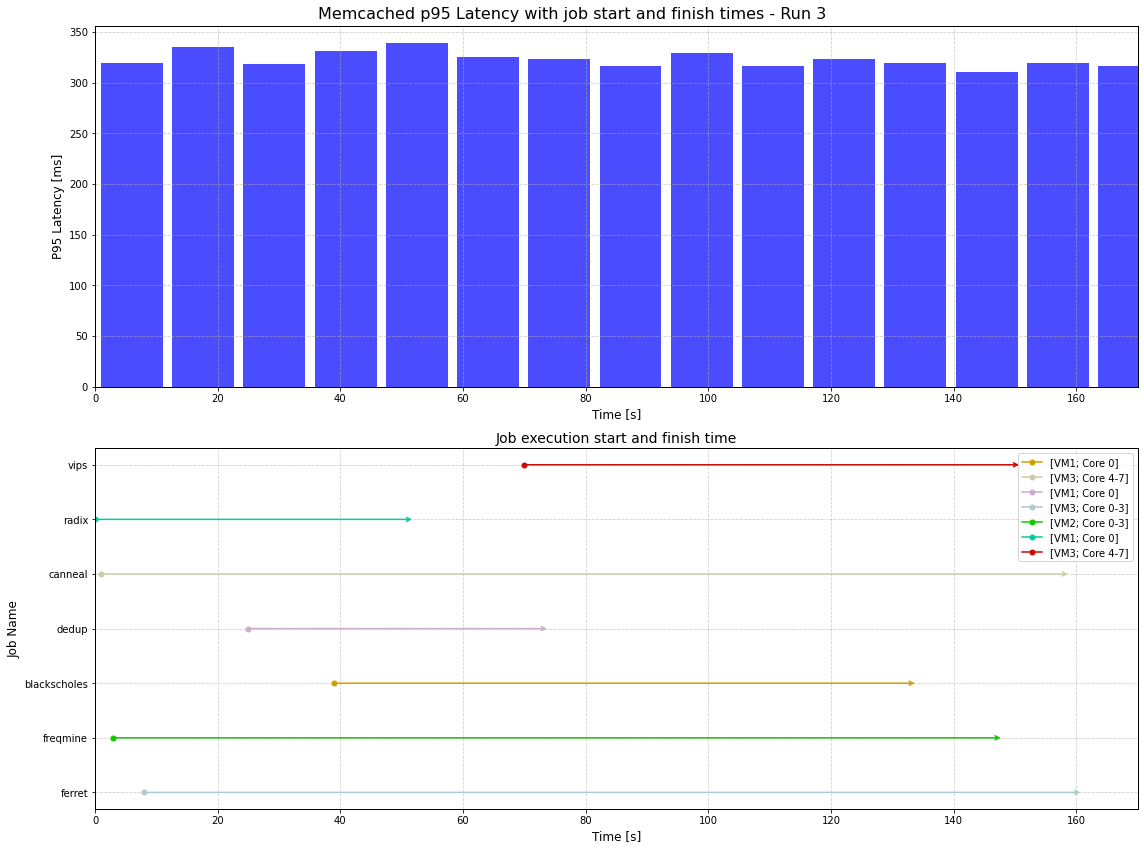

In [11]:
create_plot(table_one, run_1_start_finish_times, 1)
create_plot(table_two, run_2_start_finish_times, 2)
create_plot(table_three, run_3_start_finish_times, 3)